In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#defining the base patterns (5 x 6)
base_A = np.array([
    [0, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [1, 0, 0, 1, 0, 0]
]).flatten()

base_B = np.array([
    [1, 1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 0]
]).flatten()

base_C = np.array([
    [0, 1, 1, 1, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0]
]).flatten()

base_patterns = {'A': base_A, 'B': base_B, 'C': base_C}

In [12]:
#adding noise to the pattern
def add_noise(pattern, p=0.05):
    noisy = pattern.copy()
    flips = np.random.random(pattern.shape) < p
    noisy = np.logical_xor(noisy, flips).astype(int)
    return noisy

In [13]:
#generating datasets
def generate_data(samples_per_class, noise_p=0.05):
    X = []
    y_labels = []
    classes = ['A', 'B', 'C']
    for label_idx, letter in enumerate(classes):
        base = base_patterns[letter]
        for _ in range(samples_per_class):
            noisy_sample = add_noise(base, noise_p)
            X.append(noisy_sample)
            y_labels.append(label_idx)
    X = np.array(X)
    y = np.array(y_labels)
    return X, y

In [14]:
#one hot encoding
def one_hot(y, num_classes):
    m = y.shape[0]
    y_onehot = np.zeros((m, num_classes))
    y_onehot[np.arange(m), y] = 1
    return y_onehot

In [15]:
#actication fucntion
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [16]:
#cross entropy loss
def cross_entropy_loss(y_true, probs):
    m = y_true.shape[0]
    log_probs = -np.log(probs[np.arange(m), np.argmax(y_true, axis=1)])
    loss = np.sum(log_probs) / m
    return loss

In [17]:
#generate data
X_train, y_train_labels = generate_data(100)
X_test, y_test_labels = generate_data(10)
y_train = one_hot(y_train_labels, 3)
y_test = one_hot(y_test_labels, 3)

In [18]:
#hyperparameters
input_size = 30
hidden_size = 10
output_size = 3
learning_rate = 0.1
epochs = 1000

In [19]:
#initializing parameters
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [20]:
#training
losses = []
accuracies = []
m = X_train.shape[0]

for epoch in range(epochs):
    # Forward pass
    z1 = X_train.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    probs = softmax(z2)
    
    # Loss and accuracy
    loss = cross_entropy_loss(y_train, probs)
    losses.append(loss)
    predictions = np.argmax(probs, axis=1)
    true_labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == true_labels)
    accuracies.append(accuracy)
    
    # Backward pass
    dz2 = probs - y_train
    dW2 = a1.T.dot(dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    dz1 = dz2.dot(W2.T) * a1 * (1 - a1)
    dW1 = X_train.T.dot(dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    
    # Update parameters
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [21]:
# Testing the model
z1_test = X_test.dot(W1) + b1
a1_test = sigmoid(z1_test)
z2_test = a1_test.dot(W2) + b2
probs_test = softmax(z2_test)
test_predictions = np.argmax(probs_test, axis=1)
test_accuracy = np.mean(test_predictions == y_test_labels)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 100.00%


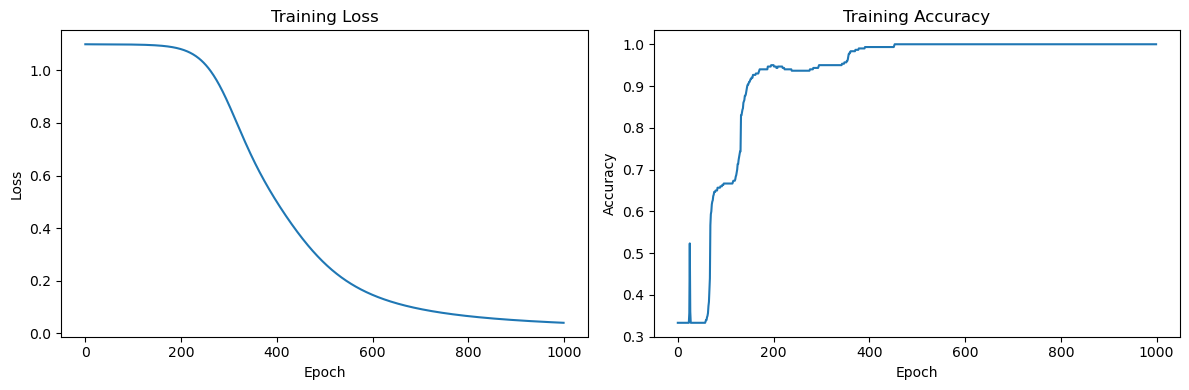

In [24]:
# Ploting the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

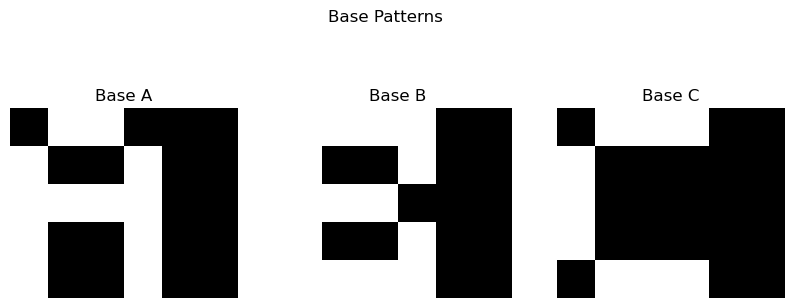

In [25]:
#visualizing the base patterns
# Visualize base patterns
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
for i, letter in enumerate(['A', 'B', 'C']):
    img = base_patterns[letter].reshape(5, 6)
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f'Base {letter}')
    axs[i].axis('off')
plt.suptitle('Base Patterns')
plt.show()

In [26]:
# Visualizing a test sample
sample_idx = 0  # First test sample
sample_img = X_test[sample_idx].reshape(5, 6)
pred_letter = ['A', 'B', 'C'][test_predictions[sample_idx]]
true_letter = ['A', 'B', 'C'][y_test_labels[sample_idx]]

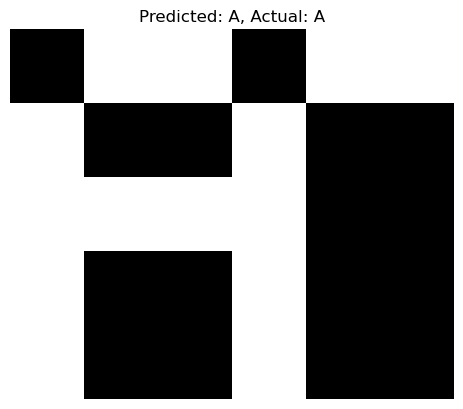

In [27]:
plt.imshow(sample_img, cmap='gray')
plt.title(f'Predicted: {pred_letter}, Actual: {true_letter}')
plt.axis('off')
plt.show()